# Definición de funciones

In [3]:
irreductible = "0000000110001011"

In [4]:
def polinomio(n):
    binario = bin(n)[2:]
    binario = '0'*16 + binario
    binario = binario[-16:]
    return binario

In [5]:
def grado(n):
    for index, element in enumerate(n):
        if element == '1':
            return 15 - index
    return 0

In [6]:
def shift(n, a):
    n = int(n, 2)
    n = n << a
    return polinomio(n)

In [7]:
def xor(m, n):
    m = int(m, 2)
    n = int(n, 2)
    return polinomio(m ^ n)

In [8]:
def divisible(m, n):
    m = polinomio(m)
    n = polinomio(n)
    
    gradom = grado(m)
    gradon = grado(n)
    
    while gradom >= gradon:
        dif = gradom - gradon
        m = xor(shift(n, dif), m)
        gradom = grado(m)
        
    return int(m, 2) == 0

In [9]:
def irreductible_polynomials():
    irreductibles = []
    for i in range(2, 512):
        if len(irreductibles) == 0:
            irreductibles.append(i)
        else:
            primo = True
            for j in irreductibles:
                primo = not divisible(i, j)
                if not primo:
                    break
            if primo:
                irreductibles.append(i)
    return irreductibles

In [10]:
def grados(n):
    grados = []
    for index, element in enumerate(n):
        if element == "1":
            grados.append(15 - index)
    return grados

In [11]:
def division(m, n):
    gradom = grado(m)
    gradon = grado(n)
    
    while gradom >= gradon:
        dif = gradom - gradon
        m = xor(shift(n, dif), m)
        gradom = grado(m)
        
    return m

In [12]:
def GF_product_p(a, b):
    a = polinomio(a)
    b = polinomio(b)
    gradosl = grados(b)
    polinomiosl = []
    for grado in gradosl:
        if grado == 0:
            polinomiosl.append(a)
        else:
            polinomiosl.append(shift(a, grado))
    
    result = None
    for i in polinomiosl:
        if result is None:
            result = i
        else:
            result = xor(result, i)
    
    if result is None:
        return 0
    
    else:
        result = division(result, irreductible)
        return int(result, 2)

In [13]:
def GF_es_generador(a):
    tabla = set()
    tabla.add(1)
    anterior = 1
    for i in range(1, 255):
        anterior = GF_product_p(anterior, a)
        tabla.add(anterior)
    else:
        return len(tabla) == 255

In [14]:
def GF_tables():
    exponencial = [1] * 255
    logaritmica = [0] * 256
    for i in range(1, 255):
        result = GF_product_p(exponencial[i - 1], 6)
        logaritmica[result] = i
        exponencial[i] = result
    return exponencial, logaritmica

In [15]:
def potencia(a, e):
    result = 1
    for i in range(0, e):
        result = GF_product_p(result, a)
    return result


In [16]:
def GF_product_t(a, b):
    if a == 0 or b == 0:
        return 0
    exponente1 = logaritmica[a]
    exponente2 = logaritmica[b]
    exponenteT = (exponente1 + exponente2) % 255
    return exponencial[exponenteT]

In [17]:
def GF_invers(a):
    exponente = logaritmica[a]
    return exponencial[(255 - exponente) % 255]

# Comprobaciones

## Multiplicacion Polinomica

In [18]:
bien = True
for i in range(0, 255):
    for j in range(0, 255):
        bien = GF_product_p(i, j) == GF_product_p(j, i)
        if not bien:
            break
    if not bien:
        break
print(bien)

True


## Multiplicaciones Tablas

In [19]:
exponencial, logaritmica = GF_tables()

bien = True
for i in range(0, 255):
    for j in range(0, 255):
        bien = GF_product_t(i, j) == GF_product_t(j, i)
        if not bien:
            break
    if not bien:
        break
print(bien)

True


## Multiplicaciones por diferente tipo

In [20]:
exponencial, logaritmica = GF_tables()

bien = True
for i in range(0, 255):
    for j in range(0, 255):
        bien = GF_product_p(i, j) == GF_product_t(i, j)
        if not bien:
            print(i, j)
            break
    if not bien:
        break
print(bien)

True


## Producto por su inverso

In [21]:
exponencial, logaritmica = GF_tables()

bien = True
for i in range(1, 255):
    bien = GF_product_p(i, GF_invers(i)) == 1
    if not bien:
        break
print(bien)

True


In [22]:
exponencial, logaritmica = GF_tables()

bien = True
for i in range(1, 255):
    bien = GF_product_t(i, GF_invers(i)) == 1
    if not bien:
        break
print(bien)

True


In [24]:
GF_product_t(0, GF_invers(0))

0

## Generador de polinomios irreductibles

In [49]:
print(irreductible_polynomials())

[2, 3, 7, 11, 13, 19, 25, 31, 37, 41, 47, 55, 59, 61, 67, 73, 87, 91, 97, 103, 109, 115, 117, 131, 137, 143, 145, 157, 167, 171, 185, 191, 193, 203, 211, 213, 229, 239, 241, 247, 253, 283, 285, 299, 301, 313, 319, 333, 351, 355, 357, 361, 369, 375, 379, 391, 395, 397, 415, 419, 425, 433, 445, 451, 463, 471, 477, 487, 499, 501, 505]


## Generadores

In [50]:
generadores = []
for i in range(0, 255):
    if GF_es_generador(i):
        generadores.append(i)
        
print(generadores)

[6, 10, 11, 12, 18, 19, 20, 22, 23, 24, 25, 29, 33, 34, 36, 38, 40, 44, 46, 47, 48, 49, 50, 54, 55, 57, 58, 59, 62, 66, 67, 68, 69, 72, 73, 74, 79, 80, 83, 87, 91, 92, 93, 95, 98, 100, 101, 102, 103, 108, 109, 110, 113, 114, 115, 116, 117, 121, 123, 125, 126, 127, 129, 130, 131, 133, 135, 136, 137, 141, 142, 143, 144, 145, 148, 149, 151, 152, 155, 158, 159, 161, 163, 165, 166, 174, 175, 176, 181, 184, 185, 186, 187, 188, 190, 196, 199, 200, 202, 203, 204, 205, 210, 213, 215, 216, 218, 220, 221, 225, 228, 229, 230, 231, 234, 235, 236, 238, 241, 242, 243, 246, 248, 249, 250, 252, 253, 254]


## Tablas exponenciales y logaritmicas

In [51]:
GF_tables();

In [52]:
print(exponencial)

[1, 6, 20, 120, 155, 76, 35, 202, 33, 198, 9, 54, 180, 174, 242, 177, 176, 182, 162, 218, 65, 13, 46, 228, 197, 3, 10, 60, 136, 38, 212, 101, 213, 99, 193, 27, 90, 87, 121, 157, 88, 91, 81, 109, 229, 195, 23, 114, 167, 196, 5, 30, 68, 19, 106, 247, 175, 244, 165, 200, 45, 238, 249, 139, 44, 232, 237, 243, 183, 164, 206, 57, 150, 98, 199, 15, 34, 204, 53, 190, 146, 122, 151, 100, 211, 119, 185, 128, 22, 116, 179, 188, 158, 82, 103, 217, 75, 49, 166, 194, 17, 102, 223, 95, 73, 61, 142, 50, 172, 254, 153, 64, 11, 58, 156, 94, 79, 41, 246, 169, 224, 221, 83, 97, 205, 51, 170, 234, 225, 219, 71, 25, 86, 127, 137, 32, 192, 29, 78, 47, 226, 209, 123, 145, 112, 171, 236, 245, 163, 220, 85, 117, 181, 168, 230, 201, 43, 250, 129, 16, 96, 203, 39, 210, 113, 173, 248, 141, 56, 144, 118, 191, 148, 110, 239, 255, 159, 84, 115, 161, 208, 125, 133, 8, 48, 160, 214, 105, 253, 147, 124, 131, 28, 72, 59, 154, 74, 55, 178, 186, 138, 42, 252, 149, 104, 251, 135, 4, 24, 80, 107, 241, 187, 140, 62, 132, 14, 

In [53]:
print(logaritmica)

[0, 0, 231, 25, 207, 50, 1, 240, 183, 10, 26, 112, 232, 21, 216, 75, 159, 100, 241, 53, 2, 225, 88, 46, 208, 131, 252, 35, 192, 137, 51, 238, 135, 8, 76, 6, 217, 220, 29, 162, 233, 117, 201, 156, 64, 60, 22, 139, 184, 97, 107, 125, 228, 78, 11, 197, 168, 71, 113, 194, 27, 105, 214, 250, 111, 20, 239, 254, 52, 224, 237, 130, 193, 104, 196, 96, 5, 219, 138, 116, 209, 42, 93, 122, 177, 150, 132, 37, 40, 222, 36, 41, 253, 223, 115, 103, 160, 123, 73, 33, 83, 31, 101, 94, 204, 187, 54, 210, 242, 43, 173, 245, 144, 164, 47, 178, 89, 151, 170, 85, 3, 38, 81, 142, 190, 181, 226, 133, 87, 158, 251, 191, 215, 182, 230, 206, 28, 134, 200, 63, 213, 167, 106, 227, 169, 143, 80, 189, 172, 203, 72, 82, 236, 110, 195, 4, 114, 39, 92, 176, 185, 179, 18, 148, 69, 58, 98, 48, 153, 119, 126, 145, 108, 165, 13, 56, 16, 15, 198, 90, 12, 152, 17, 68, 229, 86, 199, 212, 91, 235, 79, 171, 136, 34, 99, 45, 49, 24, 9, 74, 59, 155, 7, 161, 77, 124, 70, 249, 180, 141, 163, 84, 30, 32, 186, 244, 218, 95, 19, 129, 1

# Pruebas

In [54]:
import timeit
exponencial, logaritmica = GF_tables()

a = int(input("Insertar numero entero: "))

inicio = timeit.default_timer()
resultado= GF_product_p(a,0x02)
final = timeit.default_timer()
print("Tiempo producto p(a,0x02) = " + str(final - inicio) + " resultado -> " + str(resultado))

inicio = timeit.default_timer()
resultado= GF_product_t(a,0x02)
final = timeit.default_timer()
print("Tiempo producto t(a,0x02) = " + str(final - inicio) + " resultado -> " + str(resultado))

print()

inicio = timeit.default_timer()
resultado= GF_product_p(a,0x03)
final = timeit.default_timer()
print("Tiempo producto p(a,0x03) = " + str(final - inicio) + " resultado -> " + str(resultado))

inicio = timeit.default_timer()
resultado= GF_product_t(a,0x03)
final = timeit.default_timer()
print("Tiempo producto t(a,0x03) = " + str(final - inicio) + " resultado -> " + str(resultado))

print()

inicio = timeit.default_timer()
resultado= GF_product_p(a,0x09)
final = timeit.default_timer()
print("Tiempo producto p(a,0x09) = " + str(final - inicio) + " resultado -> " + str(resultado))

inicio = timeit.default_timer()
resultado= GF_product_t(a,0x09)
final = timeit.default_timer()
print("Tiempo producto t(a,0x09) = " + str(final - inicio) + " resultado -> " + str(resultado))

print()

inicio = timeit.default_timer()
resultado= GF_product_p(a,0x0B)
final = timeit.default_timer()
print("Tiempo producto p(a,0x0B) = " + str(final - inicio) + " resultado -> " + str(resultado))

inicio = timeit.default_timer()
resultado= GF_product_t(a,0x0B)
final = timeit.default_timer()
print("Tiempo producto t(a,0x0B) = " + str(final - inicio) + " resultado -> " + str(resultado))

print()

inicio = timeit.default_timer()
resultado= GF_product_p(a,0x0D)
final = timeit.default_timer()
print("Tiempo producto p(a,0x0D) = " + str(final - inicio) + " resultado -> " + str(resultado))

inicio = timeit.default_timer()
resultado= GF_product_t(a,0x0D)
final = timeit.default_timer()
print("Tiempo producto t(a,0x0D) = " + str(final - inicio) + " resultado -> " + str(resultado))

print()

inicio = timeit.default_timer()
resultado= GF_product_p(a,0x0E)
final = timeit.default_timer()
print("Tiempo producto p(a,0x0E) = " + str(final - inicio) + " resultado -> " + str(resultado))

inicio = timeit.default_timer()
resultado= GF_product_t(a,0x0E)
final = timeit.default_timer()
print("Tiempo producto t(a,0x0E) = " + str(final - inicio) + " resultado -> " + str(resultado))

Insertar numero entero: 12
Tiempo producto p(a,0x02) = 0.00012212799992994405 resultado -> 24
Tiempo producto t(a,0x02) = 6.425999981729547e-05 resultado -> 24

Tiempo producto p(a,0x03) = 0.00010787199971673544 resultado -> 20
Tiempo producto t(a,0x03) = 6.293699971138267e-05 resultado -> 20

Tiempo producto p(a,0x09) = 7.525999990320997e-05 resultado -> 108
Tiempo producto t(a,0x09) = 5.659499947796576e-05 resultado -> 108

Tiempo producto p(a,0x0B) = 7.306600036827149e-05 resultado -> 116
Tiempo producto t(a,0x0B) = 5.446099930850323e-05 resultado -> 116

Tiempo producto p(a,0x0D) = 0.0001227590000780765 resultado -> 92
Tiempo producto t(a,0x0D) = 5.734699971071677e-05 resultado -> 92

Tiempo producto p(a,0x0E) = 7.636299960722681e-05 resultado -> 72
Tiempo producto t(a,0x0E) = 5.417099964688532e-05 resultado -> 72


In [55]:
tiempoP = [0] * (255 ** 2)
for i in range(0, 255):
    for j in range(0, 255):
        inicio = timeit.default_timer()
        GF_product_p(i, j)
        final = timeit.default_timer()
        tiempoP[i * 255 + j] = final - inicio

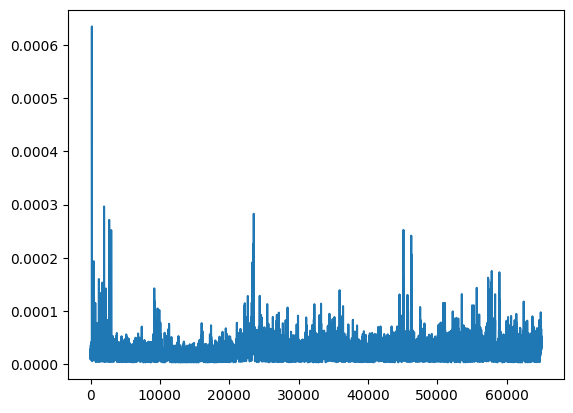

In [56]:
import matplotlib.pyplot as plt
plt.plot(tiempoP)

In [57]:
exponencial, logaritmica = GF_tables()
tiempoT = [0] * (255 ** 2)
for i in range(0, 255):
    for j in range(0, 255):
        inicio = timeit.default_timer()
        GF_product_t(i, j)
        final = timeit.default_timer()
        tiempoT[i * 255 + j] = final - inicio

Text(0.5, 0, 'Iteración')

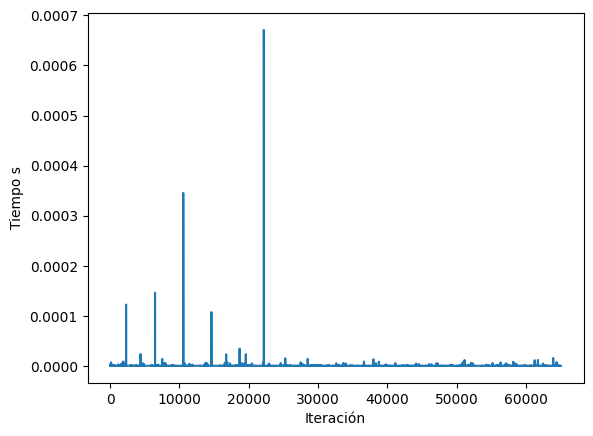

In [58]:
plt.plot(tiempoT)
plt.ylabel('Tiempo s')
plt.xlabel('Iteración')

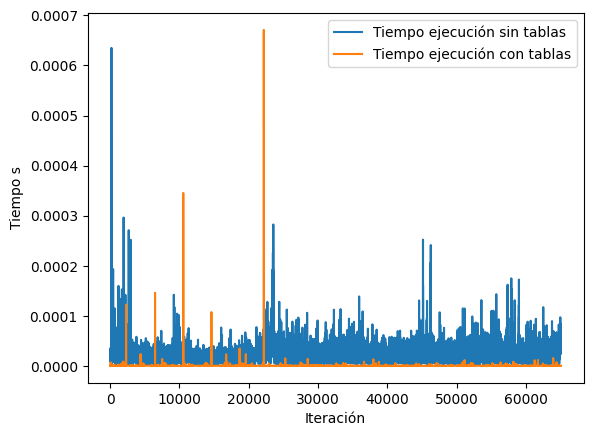

In [59]:
plt.plot(tiempoP)
plt.plot(tiempoT)
plt.ylabel('Tiempo s')
plt.xlabel('Iteración')
plt.legend(['Tiempo ejecución sin tablas','Tiempo ejecución con tablas'])

# Conclusiones

Como podemos ver, las operaciones con tabla son mucho más rápidas por lo general que la operación de multiplicación de polinomios clásica.